## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [14]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

#First we split the data between the training and testing data

from sklearn.model_selection import train_test_split

dummy_data = pd.get_dummies(original_data)
dummy_data = dummy_data.astype(int).dropna()
train_data, test_data = train_test_split(dummy_data, test_size=0.2, random_state=42)

#Now we pair each feature vector with  the corresponding label

train_features = train_data.drop(train_data.columns[train_data.columns.str.contains('outcome_type')], axis=1)
train_labels = train_data['outcome_type_Adoption']

test_features = test_data.drop(test_data.columns[test_data.columns.str.contains('outcome_type')], axis=1)
test_labels = test_data['outcome_type_Adoption']

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

d:\Anaconda\envs\ada\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the confusion matrix is:  [[7687 1610]
 [1284 5354]]


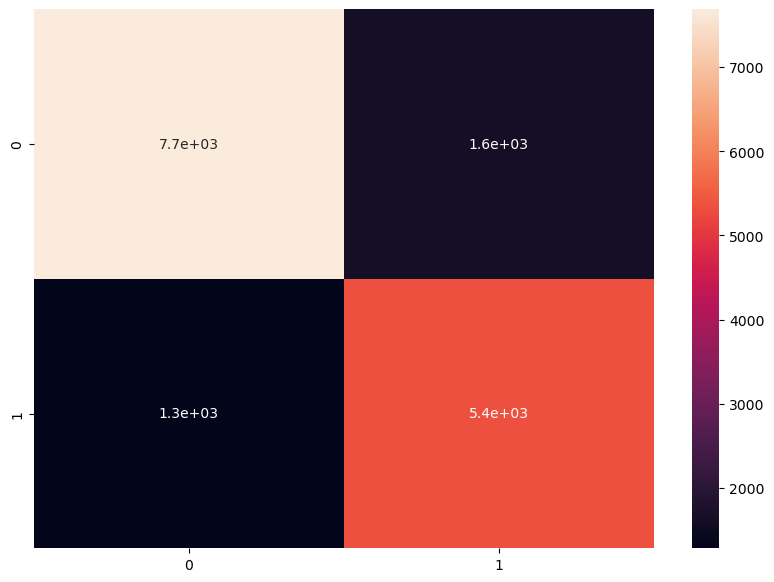

The accuracy of the model is:  81.84 %
The precision of the model is:  76.88 %
The recall of the model is:  80.66 %
The F1 score of the model is:  78.72 %


In [24]:
Predictor = LogisticRegression()

Predictor.fit(train_features, train_labels)
predictions = (Predictor.predict_proba(test_features)[:, 1] >= 0.5).astype(int)

from sklearn.metrics import confusion_matrix
confusion_matrix_pred = confusion_matrix(test_labels, predictions)

print("the confusion matrix is: ", confusion_matrix_pred)

#Now we plot the confusion matrix
df_cm = pd.DataFrame(confusion_matrix_pred, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

#Now we calculate the accuracy of the model

accuracy = (confusion_matrix_pred[0][0] + confusion_matrix_pred[1][1]) / np.sum(confusion_matrix_pred)
print("The accuracy of the model is: ", round(accuracy*100, 2), "%")

#Now we calculate the precision of the model
precision = confusion_matrix_pred[1][1] / (confusion_matrix_pred[1][1] + confusion_matrix_pred[0][1])
print("The precision of the model is: ", round(precision*100,2), "%")

#Now we calculate the recall of the model
recall = confusion_matrix_pred[1][1] / (confusion_matrix_pred[1][1] + confusion_matrix_pred[1][0])
print("The recall of the model is: ", round(recall*100,2), "%")    

#Now we calculate the F1 score of the model
F1 = 2 * (precision * recall) / (precision + recall)
print("The F1 score of the model is: ", round(F1*100, 2), "%")


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

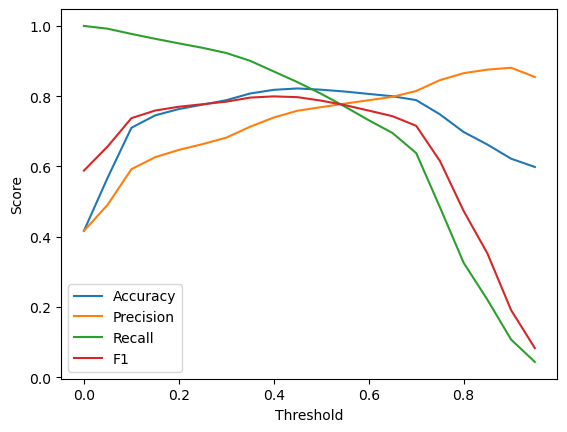

In [26]:
accuracy_list = []
precision_list = []
recall_list = []
F1_list = []

varying_threshold_list = [i for i in np.arange(0, 1, 0.05)]

for varying_threshold in varying_threshold_list:
    predictions = (Predictor.predict_proba(test_features)[:, 1] >= varying_threshold).astype(int)

    confusion_matrix_pred = confusion_matrix(test_labels, predictions)
    accuracy = (confusion_matrix_pred[0][0] + confusion_matrix_pred[1][1]) / np.sum(confusion_matrix_pred)
    accuracy_list.append(accuracy)

    precision = confusion_matrix_pred[1][1] / (confusion_matrix_pred[1][1] + confusion_matrix_pred[0][1])
    precision_list.append(precision)

    recall = confusion_matrix_pred[1][1] / (confusion_matrix_pred[1][1] + confusion_matrix_pred[1][0])
    recall_list.append(recall)

    F1 = 2 * (precision * recall) / (precision + recall)
    F1_list.append(F1)


plt.plot(varying_threshold_list, accuracy_list, label='Accuracy')
plt.plot(varying_threshold_list, precision_list, label='Precision')
plt.plot(varying_threshold_list, recall_list, label='Recall')
plt.plot(varying_threshold_list, F1_list, label='F1')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

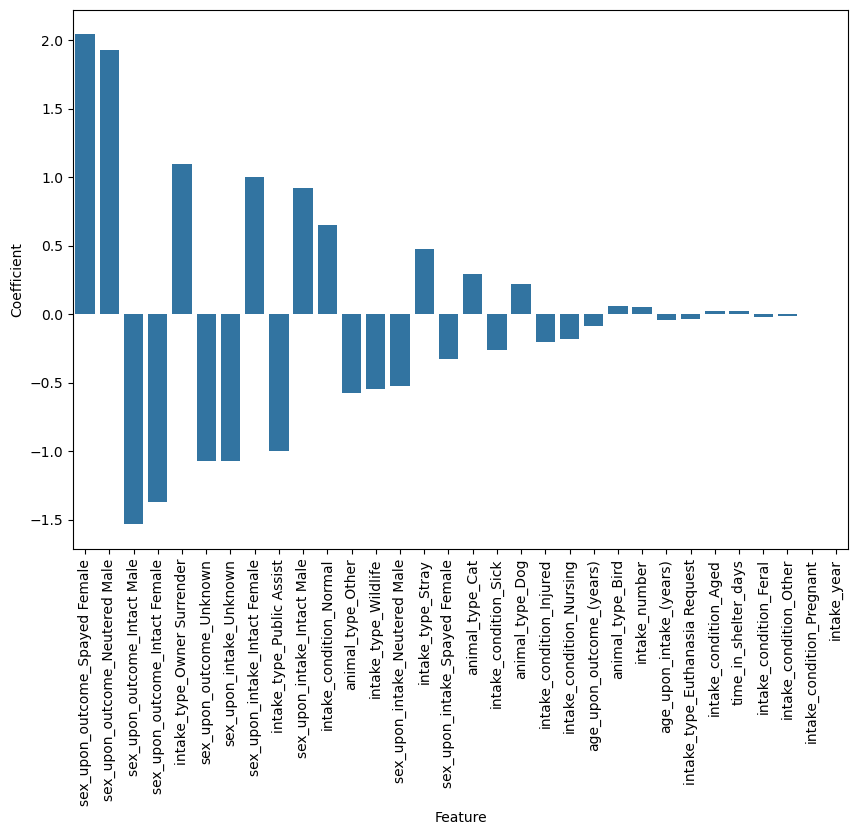

In [33]:
coefficients = Predictor.coef_[0]
features = train_features.columns

feature_coefficients = list(zip(features, coefficients))

feature_coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

plt.figure(figsize=(10, 7))
sn.barplot(x=[x[0] for x in feature_coefficients], y=[x[1] for x in feature_coefficients])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

In [ ]:
# For me the most suitable metric when dealing with unbalanced classes is the F1 score. This is because the F1 score
# takes into account both the precision and the recall of the model. 

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [ ]:
# True positive rate is 0.95